# Digit Recognition

You can create very useful clusters without having labeled data. Let's test with MNIST

0. Import usuals librairies

In [46]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


1. In Scikit Learn, import _load_digits_

In [47]:
data = load_digits()
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

2. Look at the [Load_digit](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) documentation and store the numbers in a _numbers_ variable and your target variable in a _target_ variable.

In [48]:
numbers = data.data
target = data.target

In [75]:
print(type(numbers))
print(type(target))
print(numbers.shape)
print(target)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1797, 64)
[0 1 2 ... 8 9 8]


3. Tentons de visualiser quelques nombres. Regardez d’abord la taille de votre dataset. Combien de colonnes voyez vous ?

Devinez ensuite quelle taille d’image ce nombre de colonnes devraient donner

In [4]:
numbers.shape

(1797, 64)

4. Now look at the documentation related to [imshow](https://plotly.com/python/imshow/) from plotly. Try to view a random number. Add as a title, the number this image corresponds to. Then try to view 10 random numbers in the dataset

In [26]:
for i in np.random.randint(0, numbers.shape[0], size=5):
  fig = px.imshow(numbers[i].reshape(8,8))
  fig.update_layout(title = f"Index {i} - Digit {target[i]}")
  fig.show()

5. We're going to apply the KMeans to our dataset, how many clusters do you think we're going to initialize the algorithm on?

---> 10 because we have 10 numbers in the dataset!

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

6. Create your KMeans algorithm with the right number of clusters

In [76]:
kmeans = KMeans(n_clusters=10, n_init='auto')

7. Let's evaluate our model, calculate the _accuracy_score_ of our predictions by importing the sklearn module. What do you conclude?

In [74]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.predict

bob = kmeans.fit(numbers)
labels = kmeans.predict(numbers)

print (bob)
print(kmeans)
print(bob == kmeans)


labels = kmeans.fit(numbers).predict(numbers)

labels = kmeans.fit_predict(numbers)



KMeans(n_clusters=10, n_init='auto')
KMeans(n_clusters=10, n_init='auto')
True


c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.

c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.

c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.



In [55]:
print(type(labels))
print (labels.shape)
print(labels)

<class 'numpy.ndarray'>
(1797,)
[7 9 9 ... 9 5 5]


In [13]:
accuracy_score(target, labels)
print(classification_report(target,labels)) # sinon c'est moche

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       178
           1       0.00      0.00      0.00       182
           2       0.04      0.05      0.04       177
           3       0.00      0.00      0.00       183
           4       0.00      0.00      0.00       181
           5       0.91      0.75      0.82       182
           6       0.00      0.00      0.00       181
           7       0.10      0.06      0.07       179
           8       0.02      0.02      0.02       174
           9       0.03      0.03      0.03       180

    accuracy                           0.09      1797
   macro avg       0.11      0.09      0.10      1797
weighted avg       0.11      0.09      0.10      1797



8. Look at the coordinates of the centroids (cf. [cluster_center_](http://lijiancheng0614.github.io/scikit-learn/modules/generated/sklearn.cluster.KMeans.html))

In [67]:
# https://lijiancheng0614.github.io/scikit-learn/modules/generated/sklearn.cluster.KMeans.html
centroid = kmeans.cluster_centers_
print(type(centroid))
print (centroid.shape)
print(centroid)

<class 'numpy.ndarray'>
(10, 64)
[[ 0.00000000e+00  5.98870056e-01  8.74576271e+00  1.46214689e+01
   1.40338983e+01  7.01129944e+00  5.70621469e-01 -5.55111512e-17
   1.12994350e-02  4.20338983e+00  1.26214689e+01  9.08474576e+00
   1.12429379e+01  1.19774011e+01  1.87570621e+00  1.12994350e-02
   5.64971751e-03  1.89265537e+00  3.61016949e+00  3.54237288e+00
   1.17966102e+01  9.87570621e+00  8.53107345e-01 -6.93889390e-18
  -2.16840434e-19  5.64971751e-02  9.54802260e-01  8.29943503e+00
   1.38361582e+01  6.76836158e+00  3.05084746e-01 -4.33680869e-19
   0.00000000e+00  6.21468927e-02  6.77966102e-01  4.57627119e+00
   1.17401130e+01  1.22937853e+01  2.31638418e+00  0.00000000e+00
  -1.73472348e-18  4.51977401e-01  1.44632768e+00  6.89265537e-01
   4.18644068e+00  1.23672316e+01  6.32768362e+00  5.64971751e-03
   1.73472348e-18  9.20903955e-01  7.33333333e+00  6.59887006e+00
   8.61581921e+00  1.37062147e+01  6.05649718e+00  1.75141243e-01
  -1.08420217e-19  4.74576271e-01  9.542372

9. Try to visualize each of the centroids and compare them with the different labels. What do you notice?

In [71]:
# on transforme le tableau 10x64 des centroids en une pile de 10 vignettes de 8x8 pixels
vignette = centroid.reshape(10,8,8)

for i in range(2):
  fig = px.imshow(vignette[i])
  fig.update_layout(title = f"Label : {i}")
  fig.show()

----> Looks like good predictions! It just seems that centroids don't necessarily match the label.

10. We will try to match our cluster labels with the target values. Here are some clues:

    a. Identify the most frequent target value for observations in cluster 1.

In [38]:
df_target = pd.DataFrame(target)
bob = df_target[labels==1]
bob.value_counts()

0    176
2      1
6      1
Name: count, dtype: int64

b. Programming a loop which allows to create a label vector which contains for each observation the target value corresponding to the cluster to which it belongs.

11. Re-evaluate your model. What is your new *accuracy_score*?

0.7918753478018921

12. Look at the numbers where our algorithm got it wrong the most via a confusion matrix...

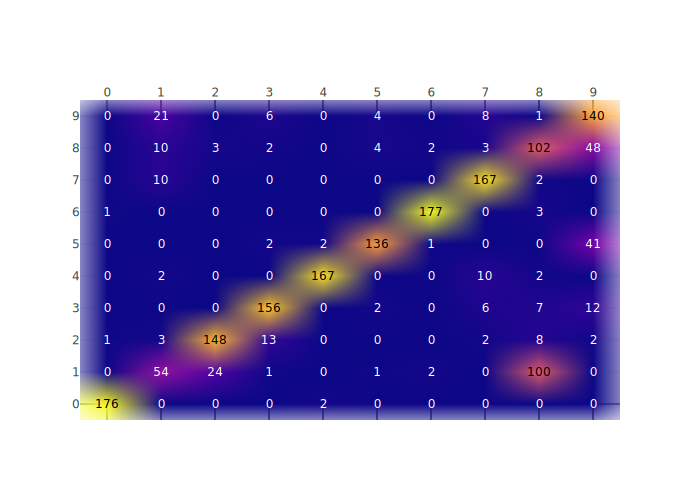